In [158]:
from sklearn.datasets import load_diabetes
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## [1] 데이터 로딩 및 전처리

In [160]:
df=pd.read_csv('./diabetes.csv')
df2=pd.read_csv('./diabetes.csv')

In [105]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [106]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [107]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [109]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [110]:
def replace_outlier(col):

    q3=df[df[col]!=0][col].quantile(.75)
    q1=df[df[col]!=0][col].quantile(.25)

    out_min=q1-1.5*(q3-q1)
    out_max=q3+1.5*(q3-q1)

    if len(df[(df[col]!=0) & (df[col]<out_min)])!=0:
        min_index=df[df[col]<out_min][col].index

        for d in min_index:
            df.loc[d, col]=out_min

    if len(df[df[col]>out_max])!=0:
        max_index=df[df[col]>out_max][col].index

        for d in max_index:
            df.loc[d, col]=out_max

In [161]:
for col in df.columns:
    replace_outlier(col)

In [162]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.841146,120.894531,70.899740,20.470052,75.157552,31.930729,0.458914,33.199870,0.348958
std,3.355923,31.972618,13.507991,15.724540,97.731654,7.699987,0.285596,11.628404,0.476951
min,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,14.500000,199.000000,104.000000,57.000000,360.625000,50.250000,1.200000,66.500000,1.000000


In [163]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[col]=df[col].replace(0, df[df[col]!=0][col].mean())

In [164]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.841146,121.686763,70.899740,29.059150,146.500000,32.394716,0.458914,33.199870,0.348958
std,3.355923,30.435949,13.507991,8.438759,64.672728,6.667462,0.285596,11.628404,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.059150,146.500000,32.394716,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,146.500000,36.600000,0.626250,41.000000,1.000000
max,14.500000,199.000000,104.000000,57.000000,360.625000,50.250000,1.200000,66.500000,1.000000


In [117]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127022,0.188693,0.089741,0.081054,0.027996,-0.017466,0.548851,0.221210
Glucose,0.127022,1.000000,0.204145,0.183351,0.443474,0.233565,0.118189,0.268535,0.492928
BloodPressure,0.188693,0.204145,1.000000,0.180305,0.073368,0.252519,0.037335,0.312837,0.121799
SkinThickness,0.089741,0.183351,0.180305,1.000000,0.177166,0.559281,0.077854,0.118032,0.214232
Insulin,0.081054,0.443474,0.073368,0.177166,1.000000,0.190135,0.081274,0.148260,0.237830
BMI,0.027996,0.233565,0.252519,0.559281,0.190135,1.000000,0.138325,0.035645,0.312740
DiabetesPedigreeFunction,-0.017466,0.118189,0.037335,0.077854,0.081274,0.138325,1.000000,0.047289,0.184969
Age,0.548851,0.268535,0.312837,0.118032,0.148260,0.035645,0.047289,1.000000,0.242702
Outcome,0.221210,0.492928,0.121799,0.214232,0.237830,0.312740,0.184969,0.242702,1.000000


## [2] 데이터 분리

In [165]:
data=df.iloc[:, :-1]
target=df.iloc[:, -1]

In [166]:
x_train, x_test, y_train, y_test=train_test_split(
data, target, stratify=target, test_size=0.2, random_state=42)

In [167]:
print(f'x_train.shape, x_test.shape : {x_train.shape}, {x_test.shape}')
print(f'y_train.shape, y_test.shape : {y_train.shape}, {y_test.shape}')

x_train.shape, x_test.shape : (614, 8), (154, 8)
y_train.shape, y_test.shape : (614,), (154,)


In [168]:
x_train, x_val, y_train, y_val=train_test_split(
x_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [169]:
print(f'x_train.shape, x_val.shape : {x_train.shape}, {x_val.shape}')
print(f'y_train.shape, y_val.shape : {y_train.shape}, {y_val.shape}')

x_train.shape, x_val.shape : (491, 8), (123, 8)
y_train.shape, y_val.shape : (491,), (123,)


### 스케일링

In [170]:
# 스케일링
scaler=StandardScaler()

In [171]:
scaler.fit(x_train)

StandardScaler()

In [172]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_val_scaled=scaler.transform(x_val)

In [173]:
x_train_scaled.shape, x_test_scaled.shape, x_val_scaled.shape

((491, 8), (154, 8), (123, 8))

## [3] 모델 생성

In [231]:
model=Sequential(name='Diabetes')

In [232]:
model.add(Dense(50, activation='relu', input_shape=(8, )))

In [233]:
model.add(Dropout(0.3))

In [234]:
model.add(Dense(100, activation='relu'))

In [235]:
model.add(Dropout(0.3))

In [236]:
model.add(Dense(1, activation='sigmoid'))

In [237]:
model.summary()

Model: "Diabetes"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                450       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_25 (Dense)            (None, 100)               5100      
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_26 (Dense)            (None, 1)                 101       
                                                                 
Total params: 5,651
Trainable params: 5,651
Non-trainable params: 0
_________________________________________________________________


In [238]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [239]:
his=model.fit(x_train, y_train, epochs=100,
             validation_data=(x_val, y_val))

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 8.9086 - accuracy: 0.5743 - val_loss: 3.3063 - val_accuracy: 0.6504
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 7.1993 - accuracy: 0.5316 - val_loss: 2.2564 - val_accuracy: 0.6504
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 6.2730 - accuracy: 0.5580 - val_loss: 1.3950 - val_accuracy: 0.6585
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 5.1271 - accuracy: 0.5255 - val_loss: 0.8645 - val_accuracy: 0.6911
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 3.5974 - accuracy: 0.5642 - val_loss: 0.7282 - val_accuracy: 0.6585
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 3.8413 - accuracy: 0.5479 - val_loss: 0.7434 - val_accuracy: 0.6585
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 3.5416 - accuracy: 0.5316 - val_loss: 0.7210 - val_accuracy: 0.6423
Epoch 8/100


Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6278 - accuracy: 0.6558 - val_loss: 0.5849 - val_accuracy: 0.7561
Epoch 60/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.6701 - val_loss: 0.5834 - val_accuracy: 0.7317
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.6802 - val_loss: 0.5812 - val_accuracy: 0.7317
Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.7169 - val_loss: 0.5847 - val_accuracy: 0.7561
Epoch 63/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.6904 - val_loss: 0.5813 - val_accuracy: 0.7398
Epoch 64/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.6823 - val_loss: 0.5801 - val_accuracy: 0.7398
Epoch 65/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.6802 - val_loss: 0.5733 - val_accuracy: 0.7317
Epoch 

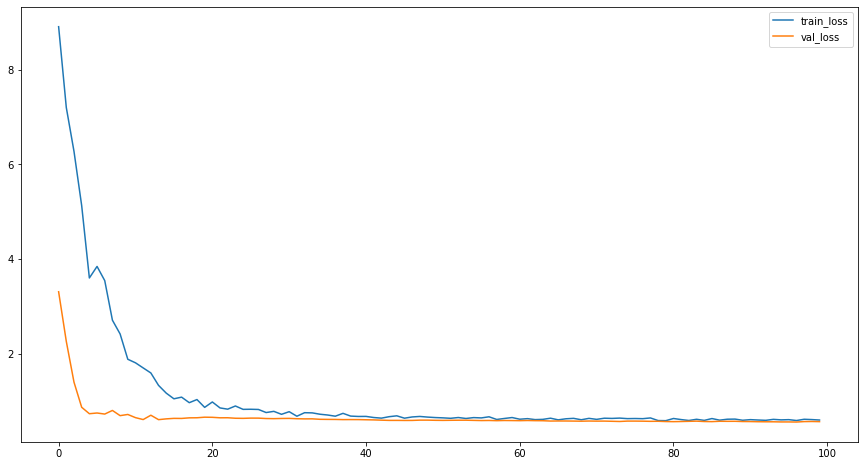

In [240]:
plt.figure(figsize=(15, 8))
plt.plot(his.epoch, his.history['loss'], label='train_loss')
plt.plot(his.epoch, his.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

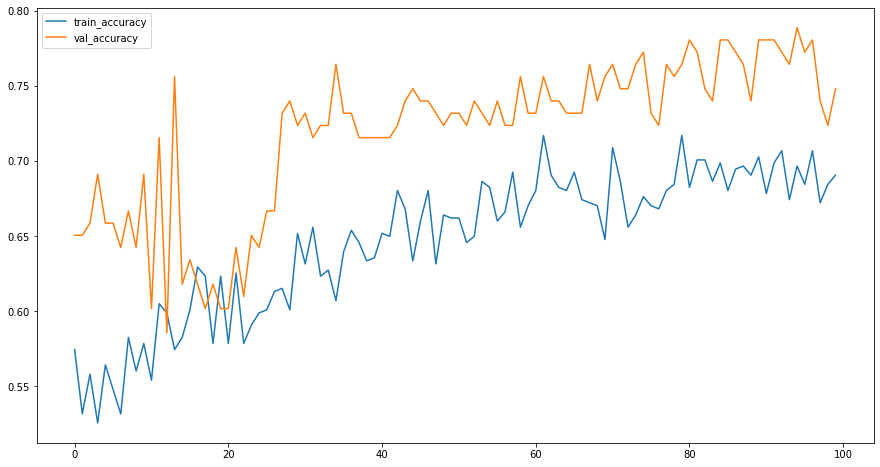

In [241]:
plt.figure(figsize=(15, 8))
plt.plot(his.epoch, his.history['accuracy'], label='train_accuracy')
plt.plot(his.epoch, his.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

---

In [183]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [184]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df2[col].replace(0, df[col].mean())